In [101]:
# Imports
%matplotlib inline
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# Get price data from Quandl
data = quandl.get("BCHAIN/MKPRU")
data = data.shift(-1) # data set has daily open, we want daily close

In [152]:
# Lets ignore 2010
data = data.loc['2011-01-01':]

In [153]:
# Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1564 entries, 2014-01-01 to 2018-04-13
Data columns (total 2 columns):
Value      1564 non-null float64
Returns    1564 non-null float64
dtypes: float64(2)
memory usage: 36.7 KB


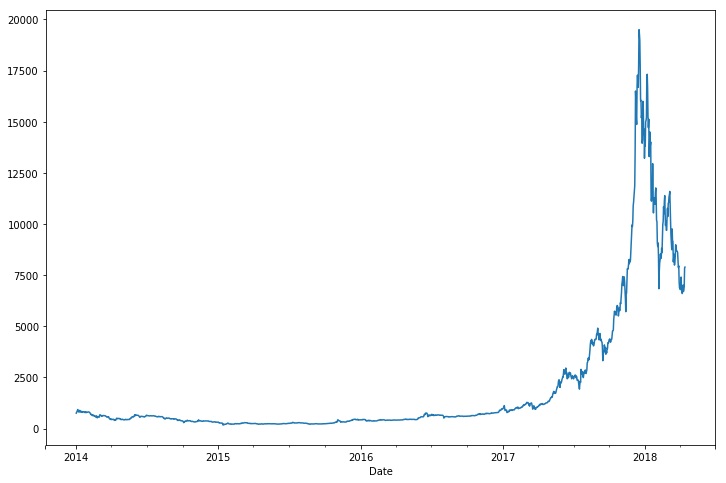

In [154]:
# Visual check of price data
data['Value'].plot(figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114fe89d0>,
      dtype=object)

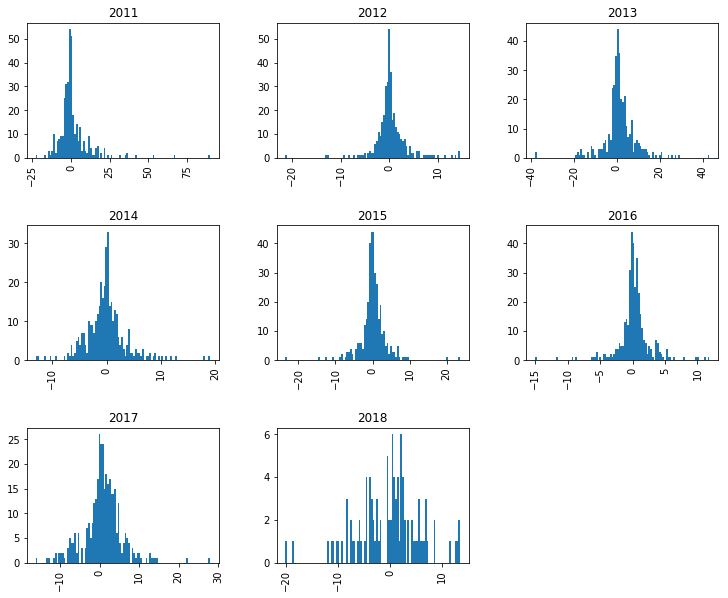

In [41]:
# Freq plot by year showing distribution of returns
(data.pct_change() * 100).hist(bins=100, figsize = (12,10), by = lambda x: x.year)

In [106]:
# Calculate returns from prices
data['Returns'] = data['Value'].pct_change()
data.dropna(inplace = True)

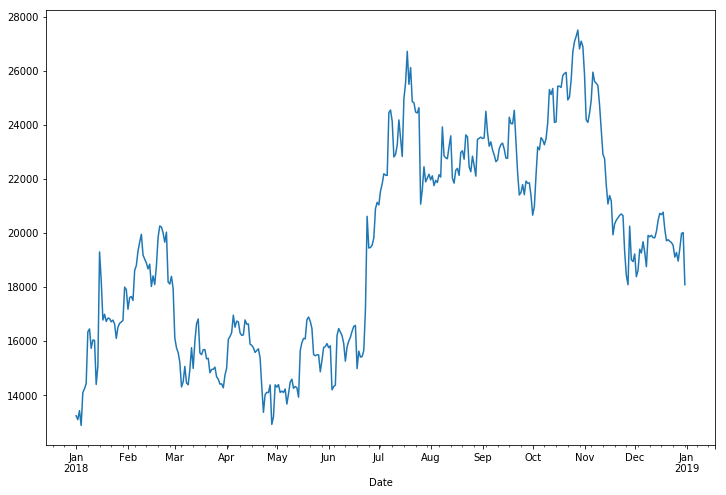

In [156]:
# simulate a random 2018 using distribution of past daily returns
dates = pd.date_range('1 Jan 2018','31 Dec 2018 ')
start_price = data.loc['2017-12-31','Value']
random_2018 = np.random.choice(data['Returns'],len(dates),replace = True)
random_2018_df = pd.DataFrame(random_2018, index = dates, columns = ['Returns'])
random_2018_df.index.name = 'Date'
random_2018_df['Value'] = start_price * (random_2018_df['Returns'] + 1).cumprod()
random_2018_df['Value'].plot(figsize=(12,8))

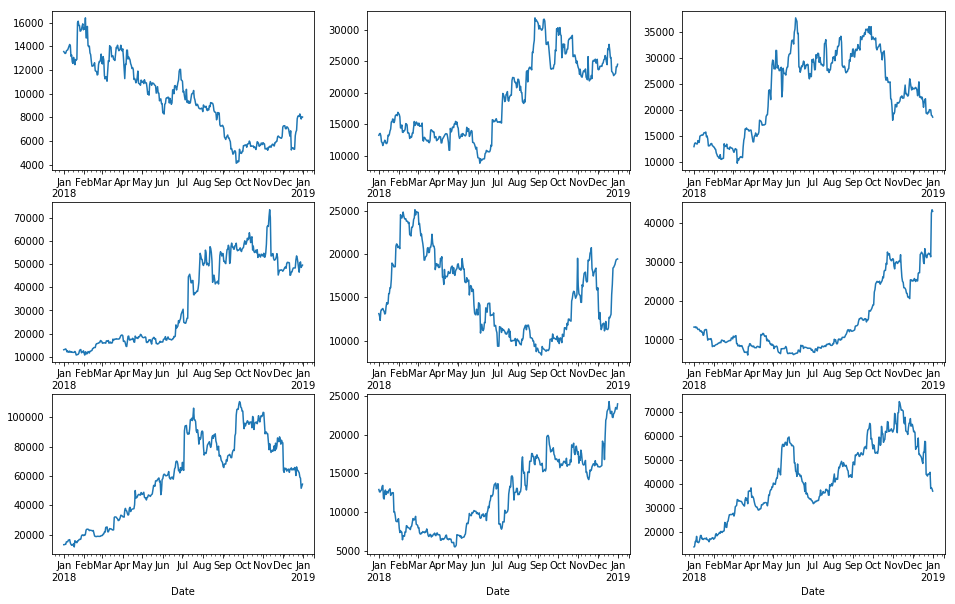

In [33]:
# simulate 9 random 2018's at a time
fig, axes = plt.subplots(nrows=3, ncols=3)
for i in range(3):
    for j in range(3):
        random_2018 = np.random.choice(data['Returns'],len(dates),replace = True)
        random_2018_df = pd.DataFrame(random_2018, index = dates, columns = ['Returns'])
        random_2018_df.index.name = 'Date'
        random_2018_df['Value'] = start_price * (random_2018_df['Returns'] + 1).cumprod()
        random_2018_df['Value'].plot(figsize=(16,10), ax=axes[i,j])

In [108]:
random_2018_df.head(10)

,Returns,Value
Date,,
2018-01-01,0.081673,15322.519370
2018-01-02,0.013075,15522.854744
2018-01-03,-0.009132,15381.093513
2018-01-04,0.004372,15448.345382
2018-01-05,-0.028813,15003.229835
2018-01-06,0.033355,15503.666910
2018-01-07,0.006192,15599.664847
2018-01-08,-0.000194,15596.635786
2018-01-09,-0.007833,15474.468926


In [165]:
# simulate many random rest of 2018's
dates = pd.date_range('14 Apr 2018','31 Dec 2018')
todays_price = data.loc['2018-04-13','Value'] # $7,895.40
start_2018_price = data.loc['2018-01-01','Value'] # $13,812.18
year_end_prices, min_prices, max_prices = [], [], []
sims = 10000
for i in np.arange(sims):
    random_2018 = np.random.choice(data['Returns'],len(dates),replace = True)
    random_2018_df = pd.DataFrame(random_2018, index = dates, columns = ['Returns'])
    random_2018_df.index.name = 'Date'
    random_2018_df['Value'] = todays_price * (random_2018_df['Returns'] + 1).cumprod()
    year_end_prices.append(random_2018_df['Value'][-1])  
    min_prices.append(random_2018_df['Value'].min())
    max_prices.append(random_2018_df['Value'].max())

(array([3.935e+03, 2.150e+03, 1.202e+03, 6.890e+02, 4.630e+02, 3.430e+02,
        2.170e+02, 1.590e+02, 1.330e+02, 1.050e+02, 9.700e+01, 7.300e+01,
        4.700e+01, 5.400e+01, 3.000e+01, 4.300e+01, 2.600e+01, 2.400e+01,
        2.900e+01, 1.700e+01, 1.400e+01, 9.000e+00, 1.600e+01, 1.400e+01,
        8.000e+00, 2.000e+00, 6.000e+00, 5.000e+00, 1.200e+01, 3.000e+00,
        5.000e+00, 8.000e+00, 7.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

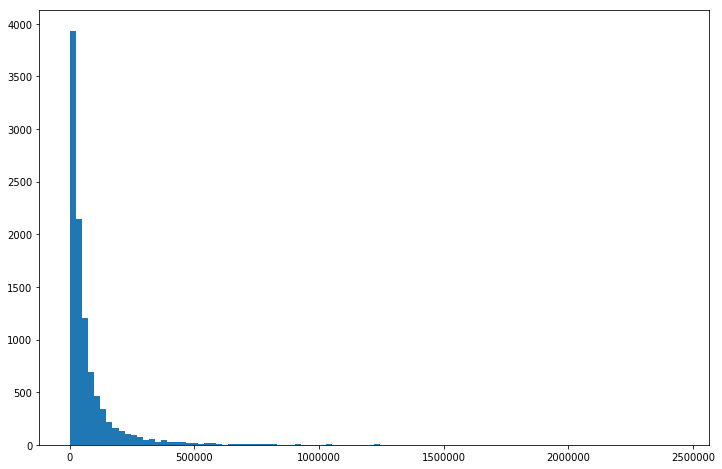

In [163]:
# Frequency plot
fig, ax = plt.subplots(figsize=(12, 8))
plt.hist(year_end_prices, bins = 100)

In [173]:
count = 0.0
for i in np.arange(sims):
    if year_end_prices[i] <= start_2018_price:
        count += 1
print count / sims * 100

60.38
